In [ ]:
#importing important libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#imorting data
df = pd.read_csv("C:/Users/megal/Downloads/archive (1)/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


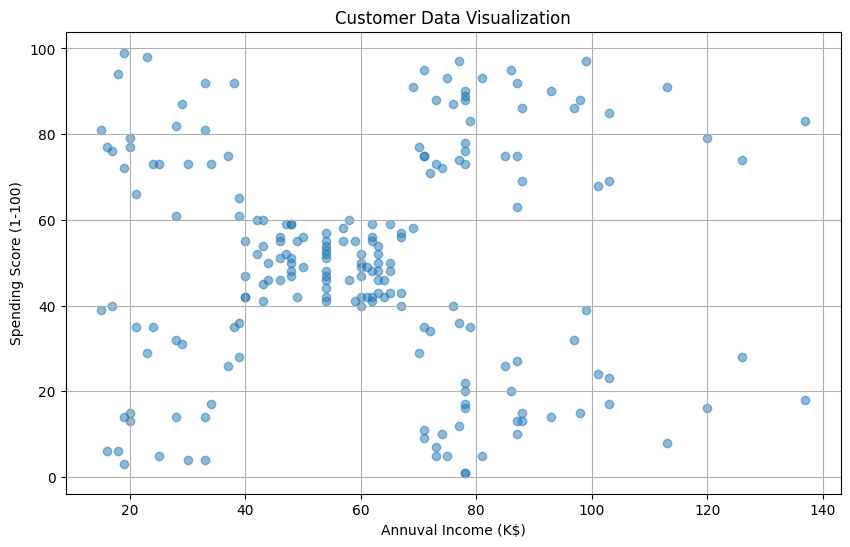

In [6]:
#visualizing dataset
plt.figure(figsize = (10,6))
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],alpha = 0.5)
plt.title('Customer Data Visualization')
plt.xlabel('Annuval Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()

In [7]:
#PCA for 2D view
pca = PCA(n_components=2)
x = pca.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']])


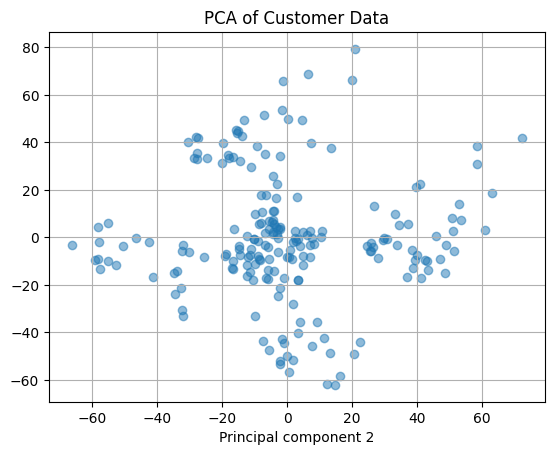

In [ ]:
#ploting PCA
plt.scatter(x[:,0],x[:,1],alpha = 0.5)
plt.title('PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.xlabel('Principal component 2')
plt.grid()
plt.show()

In [12]:
#fitting k-means
kmeans = KMeans(n_clusters = 3, random_state = 5)
df['Cluster'] = kmeans.fit_predict(x) 

In [17]:
inertia = []
k = range(1,11)

for K in k:
    kmeans = KMeans(n_clusters=K,random_state=5)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

In [20]:
print(f'Length of K: {len(k)}')
print(f'Length of inertia: {len(inertia)}')


Length of K: 10
Length of inertia: 10


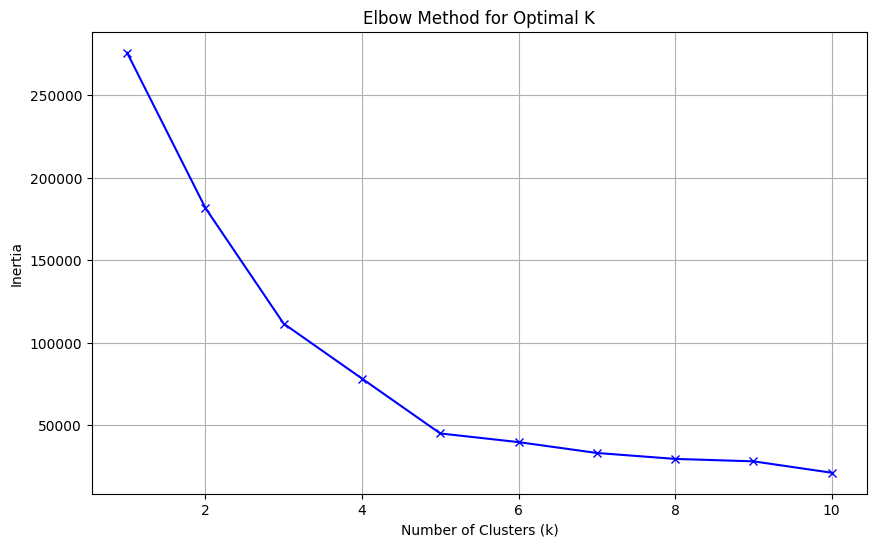

In [19]:
#ploting the elbow method
plt.figure(figsize = (10,6))
plt.plot(k,inertia,'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

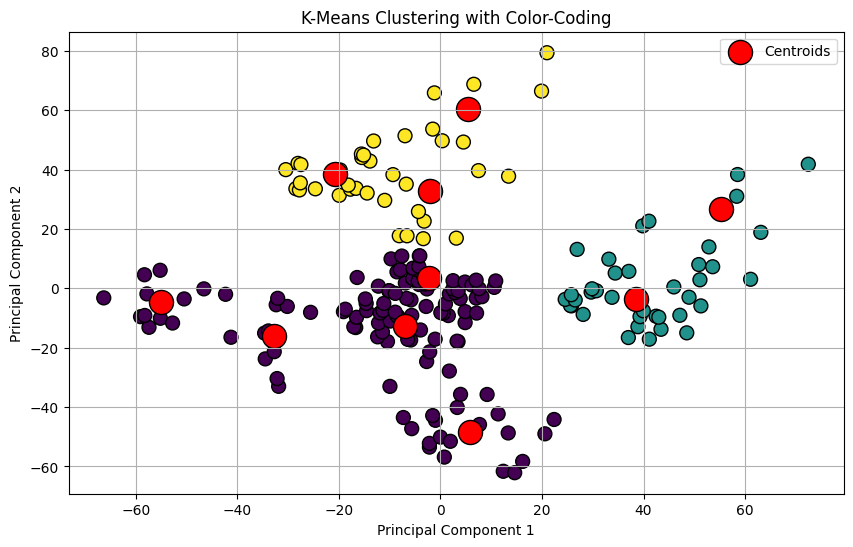

In [22]:
#visualizing clusters
plt.figure(figsize = (10,6))
plt.scatter(x[:,0],x[:,1],c = df['Cluster'],cmap = 'viridis',marker = 'o',edgecolor = 'k',s = 100)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 300,c='red',label = 'Centroids',edgecolors='k')
plt.title('K-Means Clustering with Color-Coding')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

In [25]:
#calculating silhouette score
silhouette_avg = silhouette_score(x,df['Cluster'])
print(f'Silhouette Score : {silhouette_avg:.2f}')

Silhouette Score : 0.45


In [ ]:
'''
A silhouette score of 0.45 indicates moderate clustering quality
'''

''